In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
df=pd.read_csv(r'..\data\dataset_wTotal.csv')
df.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnt_total
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422


In [22]:
import numpy as np
import pandas as pd
print(f"Tamaño del conjunto de datos antes de eliminar los valores atípicos: {df.shape}")
cols_to_check = ['income', 'mnt_total']

Q1 = df[cols_to_check].quantile(0.25)
Q3 = df[cols_to_check].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df[cols_to_check] < lower_bound) | (df[cols_to_check] > upper_bound)).any(axis=1)]


print(f"Tamaño del conjunto de datos después de eliminar los valores atípicos: {df.shape}")



Tamaño del conjunto de datos antes de eliminar los valores atípicos: (2240, 30)
Tamaño del conjunto de datos después de eliminar los valores atípicos: (2229, 30)


In [23]:
df_grouped = df.groupby("marital_status")["mnt_total"].sum().reset_index()
df_grouped = df_grouped.sort_values(by="mnt_total", ascending=False)
print(df_grouped.head(10))

  marital_status  mnt_total
3        Married     507120
5       Together     348383
4         Single     286062
2       Divorced     141660
6          Widow      56889
0         Absurd       2385
7           YOLO        848
1          Alone        770


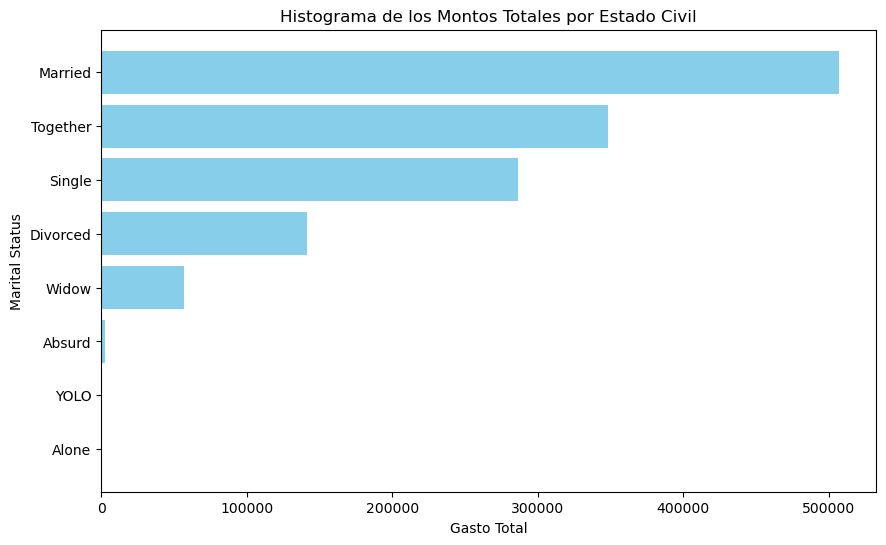

In [24]:
plt.figure(figsize=(10, 6))
plt.barh(df_grouped["marital_status"], df_grouped["mnt_total"], color="skyblue")
plt.xlabel("Gasto Total")
plt.ylabel("Marital Status")
plt.title("Histograma de los Montos Totales por Estado Civil")
plt.gca().invert_yaxis() 
plt.show()

**Los casados gastan mas que los solteros. Gastan 1,7 veces mas.**

  marital_status    mnt_total
0         Absurd  1192.500000
6          Widow   738.818182
2       Divorced   613.246753
5       Together   605.883478
4         Single   598.456067
3        Married   588.989547
7           YOLO   424.000000
1          Alone   256.666667


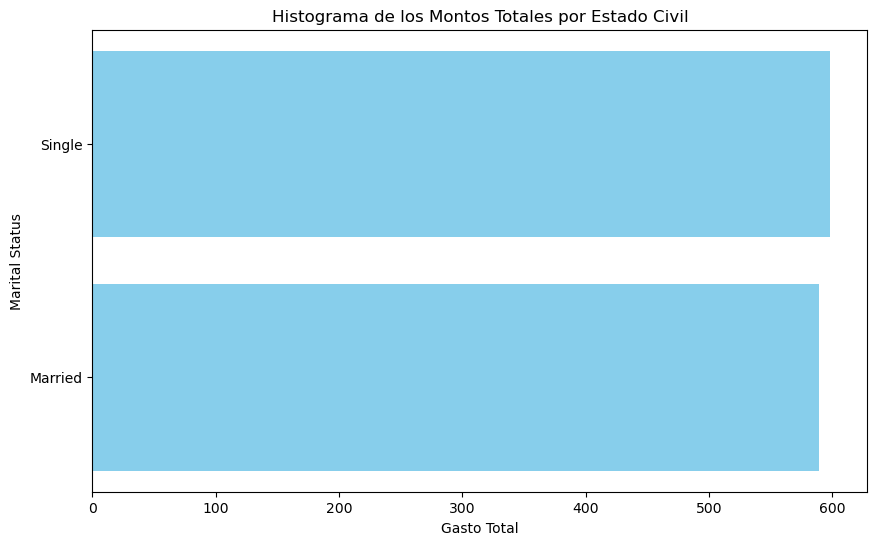

In [ ]:
df_grouped = df.groupby("marital_status")["mnt_total"].mean().reset_index()
df_grouped = df_grouped.sort_values(by="mnt_total", ascending=False)
print(df_grouped.head(10))


df_grouped = df_grouped[df_grouped['marital_status'].isin(['Single', 'Married'])]


plt.figure(figsize=(10, 6))
plt.barh(df_grouped["marital_status"], df_grouped["mnt_total"], color="skyblue")
plt.xlabel("Gasto Total")
plt.ylabel("Marital Status")
plt.title("Histograma de los Montos Totales por Estado Civil")
plt.gca().invert_yaxis()
plt.show()

**Podemos ver como ligeramente los solteros tienen un gasto promedio mayor aquellos que estan solteros.**